<a href="https://colab.research.google.com/github/Xeesto/UEP/blob/main/PUM4_Regresja_Liniowa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone "https://github.com/Xeesto/UEP"

Cloning into 'UEP'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 39 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (39/39), 63.89 KiB | 872.00 KiB/s, done.
Resolving deltas: 100% (13/13), done.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.preprocessing import StandardScaler

In [6]:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Salary Data.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "rkiattisak/salaly-prediction-for-beginer",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

<ipython-input-6-72cc2aa30810>:9: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


100%|██████████| 18.9k/18.9k [00:00<00:00, 20.1MB/s]

First 5 records:     Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [12]:
col_to_change=[ 'Gender', 'Education Level', 'Job Title']
for col in col_to_change:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               375 non-null    int64  
 2   Education Level      375 non-null    int64  
 3   Job Title            375 non-null    int64  
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 17.7 KB


In [16]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X, y = load_diabetes(return_X_y=True)
X = X[:, [2]]  # Use only one feature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30, shuffle=False)

In [17]:
# Wyświetlenie danych testowych i treningowych

import pandas as pd

df_train = pd.DataFrame({'Feature': X_train.flatten(), 'Target': y_train})
df_test = pd.DataFrame({'Feature': X_test.flatten(), 'Target': y_test})

print("Train Data:\n", df_train.head())
print("\nTest Data:\n", df_test.head())

Train Data:
     Feature  Target
0  0.061696   151.0
1 -0.051474    75.0
2  0.044451   141.0
3 -0.011595   206.0
4 -0.036385   135.0

Test Data:
     Feature  Target
0  0.085408   261.0
1 -0.000817   113.0
2  0.006728   131.0
3  0.008883   174.0
4  0.080019   257.0


In [18]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression().fit(X_train, y_train)

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = regressor.predict(X_test)

print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.2f}")

Mean squared error: 3035.06
Coefficient of determination: 0.41


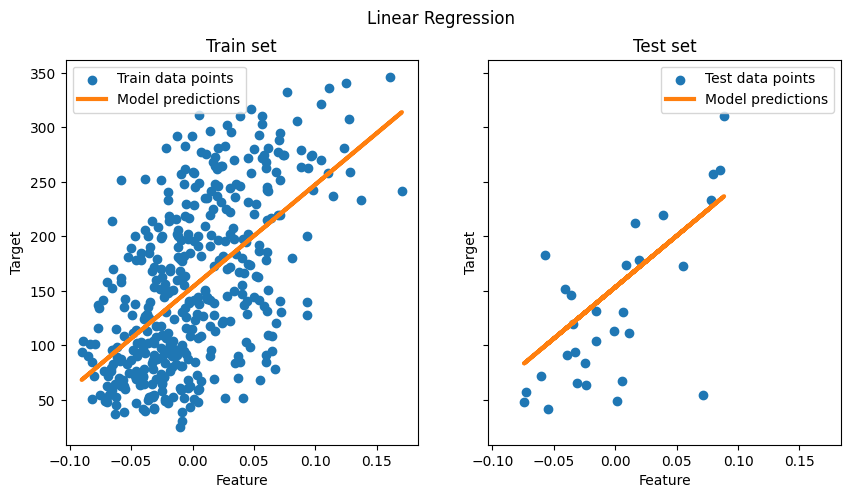

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)

ax[0].scatter(X_train, y_train, label="Train data points")
ax[0].plot(
    X_train,
    regressor.predict(X_train),
    linewidth=3,
    color="tab:orange",
    label="Model predictions",
)
ax[0].set(xlabel="Feature", ylabel="Target", title="Train set")
ax[0].legend()

ax[1].scatter(X_test, y_test, label="Test data points")
ax[1].plot(X_test, y_pred, linewidth=3, color="tab:orange", label="Model predictions")
ax[1].set(xlabel="Feature", ylabel="Target", title="Test set")
ax[1].legend()

fig.suptitle("Linear Regression")

plt.show()

In [22]:
# średni błąd kwadratowy, średni błąd absolutny, wynik wyjaśnionej wariancji
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)

print(f"Średni błąd kwadratowy: {mse}")
print(f"Średni błąd absolutny: {mae}")
print(f"Wynik wyjaśnionej wariancji: {mse}")

Średni błąd kwadratowy: 3035.060115291269
Średni błąd absolutny: 43.49286787904107
Wynik wyjaśnionej wariancji: 3035.060115291269
